In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [5]:
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
df.dropna(inplace=True)


In [7]:
df.drop('customerID', axis=1, inplace=True)


In [8]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})


In [31]:
df_original = df.copy()

In [32]:
df = pd.get_dummies(df, drop_first=True)


In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


C:\Users\shravya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [15]:
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]


In [16]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7853589196872779
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



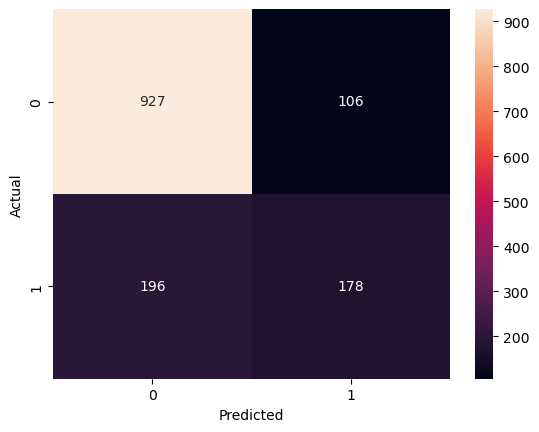

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [18]:
importances = rf.feature_importances_
features = X.columns

fi = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

fi.head(10)


,Feature,Importance
3,TotalCharges,0.193409
2,MonthlyCharges,0.169758
1,tenure,0.167572
10,InternetService_Fiber optic,0.039999
28,PaymentMethod_Electronic check,0.035016
13,OnlineSecurity_Yes,0.028905
25,Contract_Two year,0.028618
4,gender_Male,0.026971
19,TechSupport_Yes,0.025829
26,PaperlessBilling_Yes,0.025044


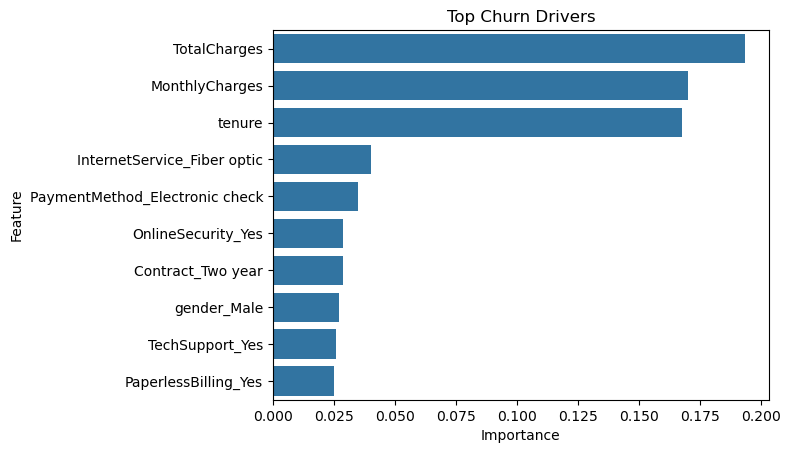

In [19]:
sns.barplot(x='Importance', y='Feature', data=fi.head(10))
plt.title("Top Churn Drivers")
plt.show()


In [20]:
df_results = X_test.copy()
df_results['Churn_Probability'] = y_prob
df_results['Actual_Churn'] = y_test.values

df_results.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Probability,Actual_Churn
2481,1,61,25.00,1501.75,True,True,False,True,False,True,...,True,False,False,True,False,False,False,False,0.00,0
6784,0,19,24.70,465.85,False,False,False,True,False,True,...,True,False,False,False,False,False,False,False,0.08,0
6125,0,13,102.25,1359.00,True,True,False,True,False,True,...,False,True,False,False,True,True,False,False,0.59,1
3052,0,37,55.05,2030.75,True,True,False,True,False,True,...,False,False,False,False,True,False,False,True,0.06,0
4099,0,6,29.45,161.45,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,0.30,0


In [21]:
df_results.to_csv("churn_results.csv", index=False)
